In [2]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [3]:
import pandas as pd
import os

def read_banking_data():
    directory = "//".join([os.getcwd(), "data", "bank-marketing", "bank-additional-full.csv"])
    df = pd.read_csv(directory, sep=";")

    for column in df.columns:
        column_type = str(df[column].dtype)
        if "int" not in column_type and "float" not in column_type:
            df[column] = df[column].astype("category")

    cat_columns = df.select_dtypes(['category']).columns
    df_codified = df.copy()
    df_codified[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    
    return df, df_codified

In [4]:
df, df_codified = read_banking_data()

In [5]:
from sklearn.decomposition import PCA
def pca_experiment(df):
    pca = PCA()
    pca.fit(df)
    print(pca.explained_variance_ratio_)
    print(sum(pca.explained_variance_ratio_[:3]))
    print(sum(pca.explained_variance_ratio_[:2]))

In [6]:
pca_experiment(df_codified.loc[:,df.columns!="y"])

[6.26788004e-01 3.30833615e-01 4.08471400e-02 1.01374092e-03
 1.92314271e-04 1.20238712e-04 6.96673197e-05 4.96416195e-05
 3.82617908e-05 1.80198272e-05 9.08848239e-06 7.24184225e-06
 4.84543109e-06 2.87288460e-06 1.92717561e-06 1.42287924e-06
 1.31112996e-06 2.47969899e-07 2.17159931e-07 1.81502791e-07]
0.998468759079651
0.9576216190451263


In [7]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(df_codified.loc[:,df_codified.columns!="y"])
df_reduced = pd.DataFrame(data = reduced, columns = ["x", "y", "z"])
df_reduced["label"] = df.y

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def plot_per_label(df):
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    yes = df.loc[df.label == "yes"]
    no = df.loc[df.label == "no"]
    ax.scatter3D(yes.x, yes.y, yes.z, alpha=0.5)
    ax.scatter3D(no.x, no.y, no.z, alpha=0.5)
    plt.show()

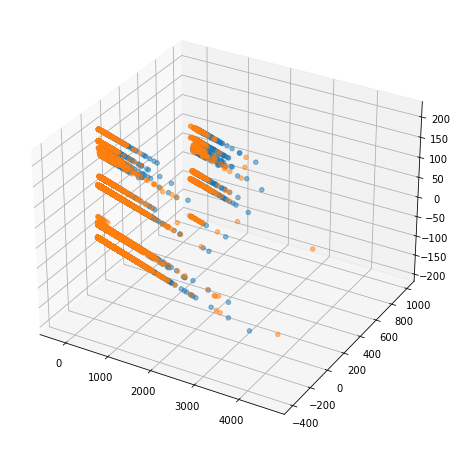

In [62]:
plot_per_label(df_reduced)

In [66]:
def plot_samples(node_data, per_label=False):
    if not per_label:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='3d')
    for df in node_data:
        if per_label:
            plot_per_label(df)
        else:
            ax.scatter3D(df.x, df.y, df.z, alpha =0.3)
    if not per_label:
        plt.show()

In [ ]:
suffled_df = df_reduced.sample(frac=1)
no_nodes = 8
sample_size =  int(df_reduced.shape[0]/no_nodes)
node_data = [suffled_df.iloc[i*sample_size:(i+1) * sample_size] for i in range(no_nodes)]

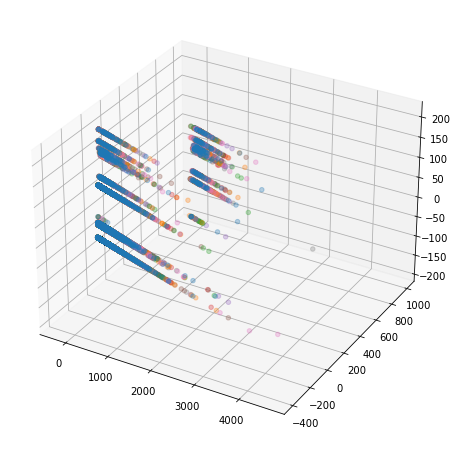

In [67]:
plot_samples(node_data)

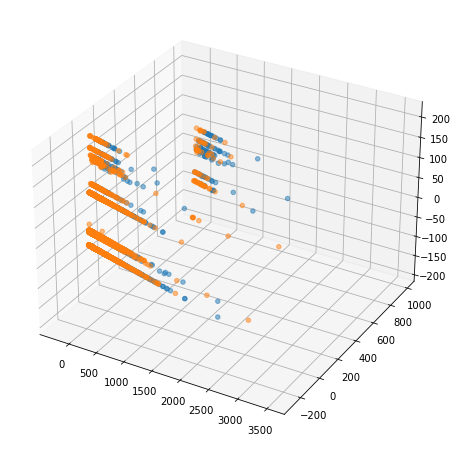

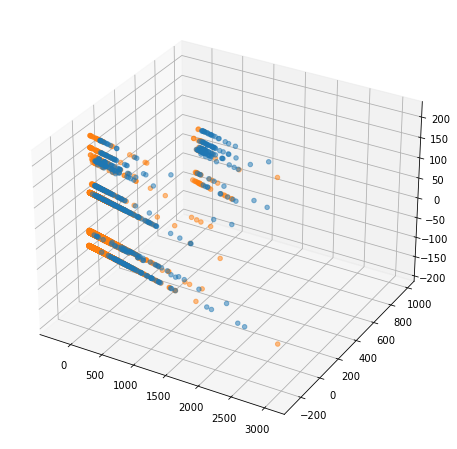

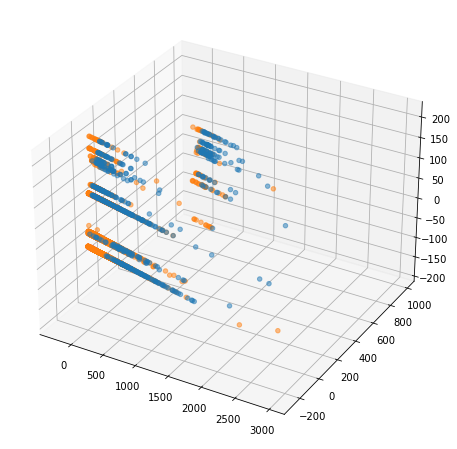

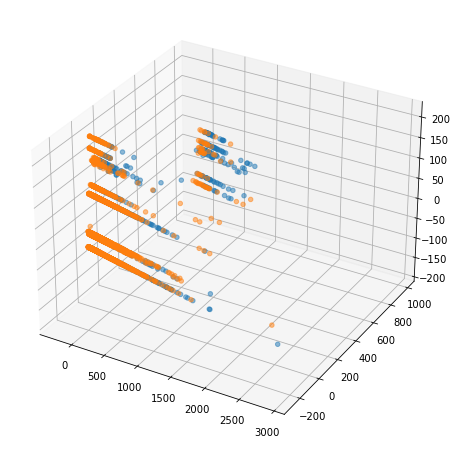

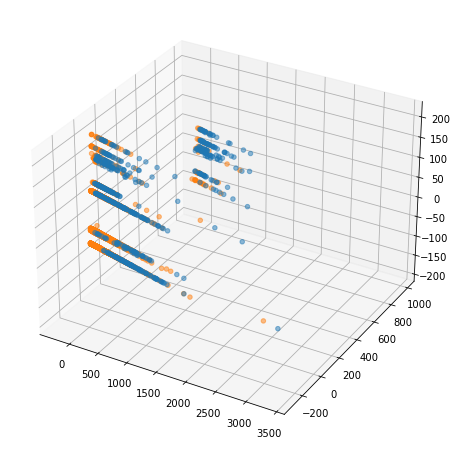

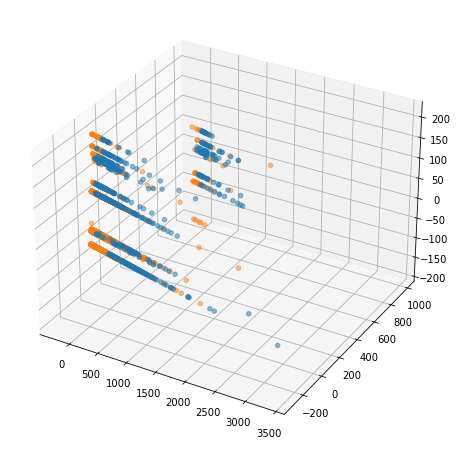

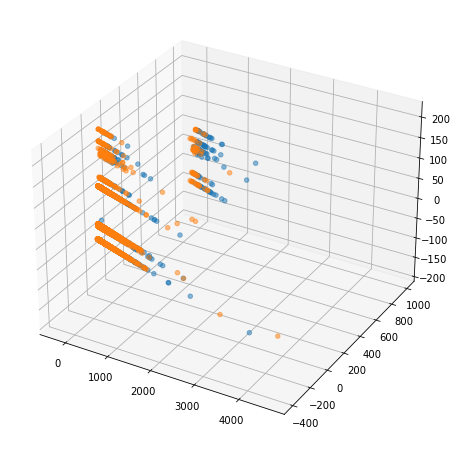

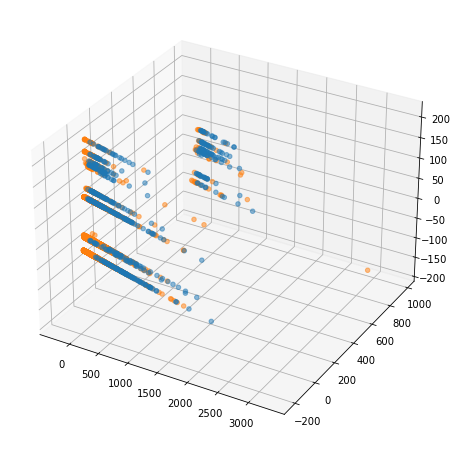

In [68]:
plot_samples(node_data, per_label=True)

In [69]:
from maximum_mean_discrepancy import avg_similarity_disimilarity_MMD as ASDMMD
ASDMMD(node_data, [1,2], [0,3,4,5,6,7] , "rbf", 0.5, return_tables = True)

AttributeError: 'DataFrame' object has no attribute 't'